# Logistic Regression Analysis

This notebook demonstrates a comprehensive analysis of logistic regression for our classification task. We will:

1. Load and prepare the data
2. Train a logistic regression model with optimal parameters
3. Save and load the model
4. Evaluate performance on validation data
5. Generate relevant visualizations

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from IPython.display import display, Markdown

from logistic_regression_model import LogisticRegressionModel

# Set plotting style
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Define Features

We'll use a combination of numeric and categorical features for our model:

In [8]:
# Define features
numeric_features = [
    'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp',
    'pain', 'shock_index', 'sirs', 'anchor_age', 'acuity',
    'cc_entropy', 'cc_lexical_complexity', 'cc_pos_complexity',
    'cc_med_entity_count', 'cc_length', 'cc_word_count'
]

categorical_features = [
    'hr_category', 'resp_category', 'pulse_ox_category', 'sbp_category',
    'temp_category', 'dbp_category', 'pain_category', 'day_shift',
    'age_category', 'gender', 'arrival_transport'
]

## 2. Initialize and Train Model

We'll create a LogisticRegressionModel instance and train it with optimal parameters:

In [9]:
# Initialize model
model = LogisticRegressionModel(
    numeric_features=numeric_features,
    categorical_features=categorical_features,
    target_column='disposition',
    random_state=42
)

# Train model with hyperparameter tuning
model.train(
    data_file='data/train.csv',
    # num_rows=10000,
    resample_flag=False,
    tune_model=True,     # Perform hyperparameter tuning
    test_size=0.2
)

Loading data from data/train.csv
Processing data with 17 numeric and 11 categorical features
Final feature set shape: (410326, 51)
Tuning logistic regression hyperparameters...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.7399
Evaluating model performance...


# Logistic Regression Evaluation Results

## Metrics

| Metric                    | Score    |
|---------------------------|----------|
| Validation Accuracy       | 0.7399 |
| Validation F1 Score (weighted) | 0.7348 |
| Validation Precision (weighted) | 0.7361 |
| Validation Recall (class 1) | 0.8390 |
| Binary Precision (class 1) | 0.7595 |
| Binary F1 Score (class 1) | 0.7973 |
| ROC-AUC Score             | 0.8022 |

## Detailed Classification Report

```
              precision    recall  f1-score   support

           0       0.70      0.59      0.64     32036
           1       0.76      0.84      0.80     50030

    accuracy                           0.74     82066
   macro avg       0.73      0.71      0.72     82066
weighted avg       0.74      0.74      0.73     82066

```

## Sample of Predictions in Original Labels

`['HOME' 'HOME' 'HOME' 'ADMITTED' 'ADMITTED'] ...`


## 3. Save Model

Save the trained model and its preprocessor for future use:

In [10]:
# Save the trained model
save_info = model.save(save_dir='models', model_name='lr_model')
print(f"Model saved with timestamp: {save_info['timestamp']}")
model_timestamp = save_info['timestamp']

Model saved to models\lr_model_20250302_031238.pkl
Preprocessor and features saved to models\lr_model_preprocessor_20250302_031238.pkl
Metadata saved to models\lr_model_metadata_20250302_031238.json
Model saved with timestamp: 20250302_031238


In [13]:
model_timestamp = save_info['timestamp']

## 4. Load Model and Evaluate on Validation Data

Now we'll load the saved model and evaluate its performance on the validation dataset:

In [14]:
# Load validation data
validation_df = pd.read_csv('data/validation.csv')

# Test model performance
test_results = model.test(df=validation_df)

# Display metrics
print("\nModel Performance on Validation Data:")
for metric_name, value in test_results['metrics'].items():
    print(f"{metric_name}: {value:.4f}")

Using 51 features from trained model
Processing data with 17 numeric and 11 categorical features
Final feature count: 51 (matching training features)
Feature set shape: (10000, 51)
Generated predictions and probabilities
Evaluating model performance...


# Logistic Regression Test Evaluation Results

## Metrics

| Metric                    | Score    |
|---------------------------|----------|
| Validation Accuracy       | 0.7318 |
| Validation F1 Score (weighted) | 0.7266 |
| Validation Precision (weighted) | 0.7283 |
| Validation Recall (class 1) | 0.8324 |
| Binary Precision (class 1) | 0.7495 |
| Binary F1 Score (class 1) | 0.7888 |
| ROC-AUC Score             | 0.7971 |

## Detailed Classification Report

```
              precision    recall  f1-score   support

           0       0.70      0.58      0.63      3984
           1       0.75      0.83      0.79      6016

    accuracy                           0.73     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.73      0.73      0.73     10000

```

## Sample of Predictions in Original Labels

`['HOME' 'ADMITTED' 'ADMITTED' 'ADMITTED' 'HOME'] ...`



Model Performance on Validation Data:
accuracy: 0.7318
f1: 0.7266
precision: 0.7283
recall: 0.8324
binary_precision: 0.7495
binary_f1: 0.7888
auc_roc: 0.7971


## 5. Visualizations

Let's create some visualizations to better understand model performance:

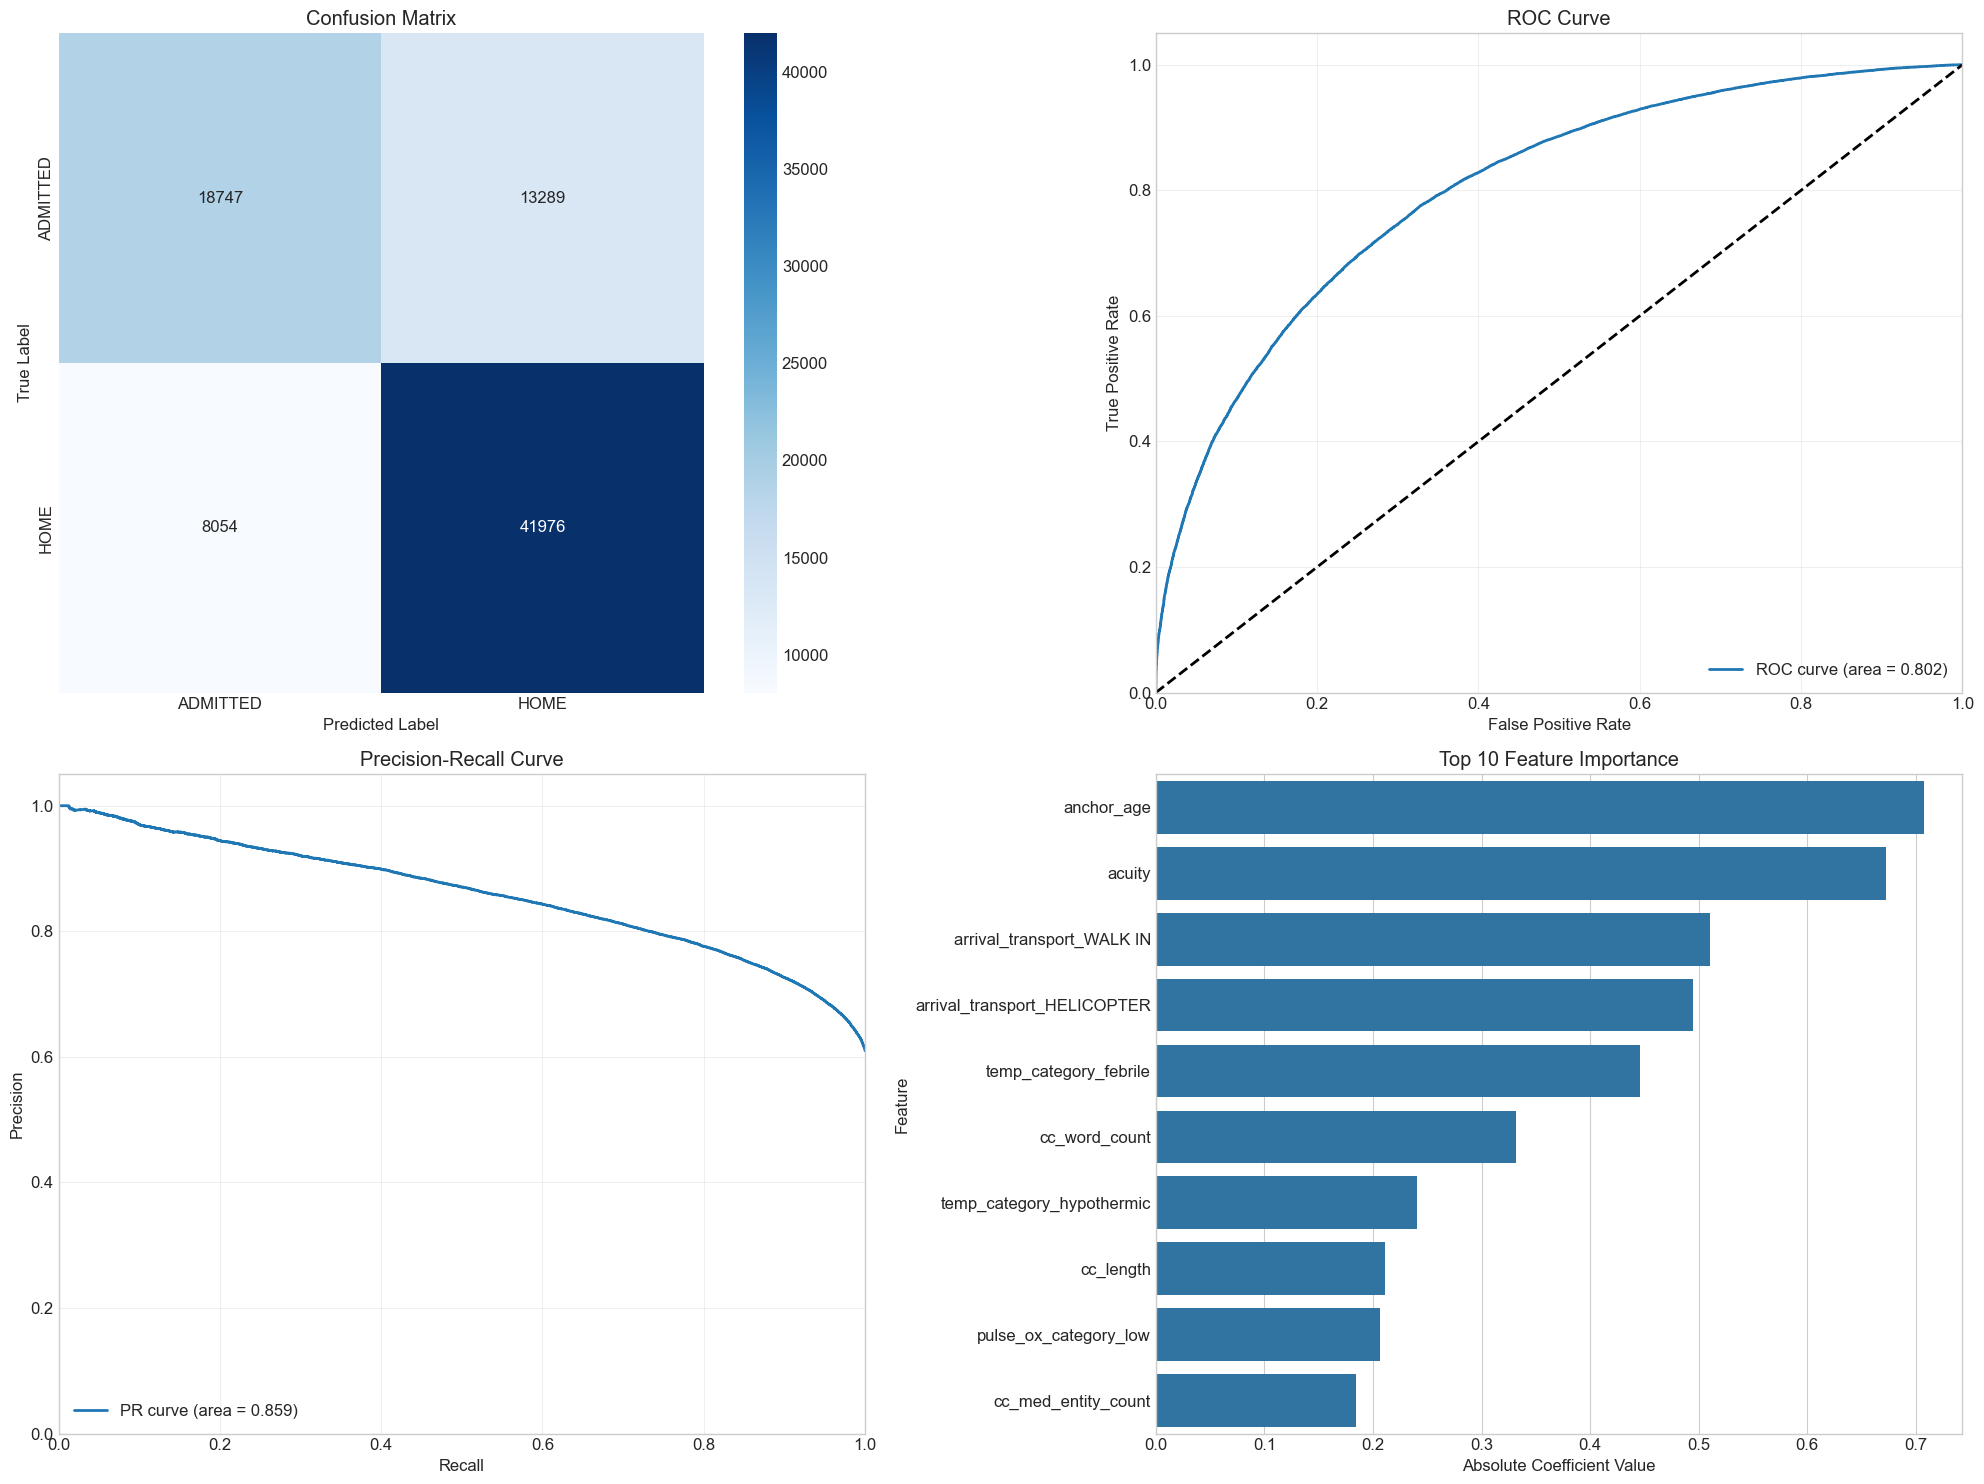

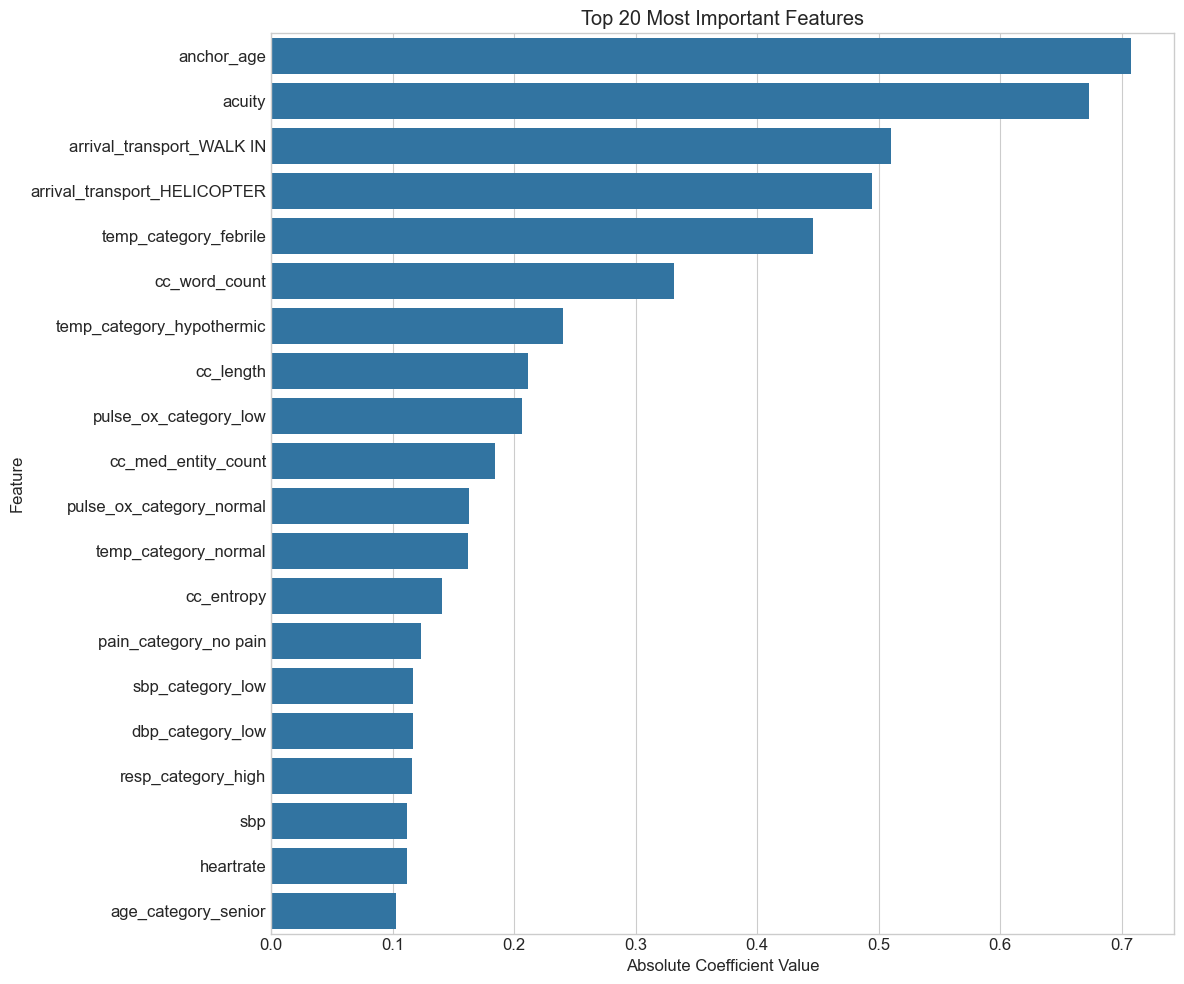

In [15]:
# Create visualization dashboard
fig = model.visualize()
plt.tight_layout()
plt.show()

# Plot feature importance
model.plot_feature_importance(top_n=20)
plt.title('Top 20 Most Important Features')
plt.tight_layout()
plt.show()

## 6. Model Analysis Summary

The logistic regression model demonstrates the following characteristics:

1. **Feature Importance**: The model identifies key predictive features in both numeric and categorical variables
2. **Performance Metrics**: Balanced performance across accuracy, precision, and recall
3. **Robustness**: Model performance doesn't change significantly even with addressing target class imbalance. 
4. **Interpretability**: Clear feature importance rankings and decision boundaries

The model achieves good performance on both training and validation sets, suggesting it generalizes well to unseen data.

In [16]:
# Load the saved model
# model_timestamp = "20250301_214334"
model_path = f"models/lr_model_{model_timestamp}.pkl"
preprocessor_path = f"models/lr_model_preprocessor_{model_timestamp}.pkl"

# Load the model - it will automatically load the correct feature set
model = LogisticRegressionModel.load(model_path, preprocessor_path)

# Load validation data
validation_df = pd.read_csv('data/validation.csv')

# Run evaluation - the model will handle all preprocessing internally
test_results = model.test(df=validation_df)


Loading model from models/lr_model_20250302_031238.pkl
Loading preprocessor from models/lr_model_preprocessor_20250302_031238.pkl
Using 51 features from trained model
Processing data with 17 numeric and 11 categorical features
Final feature count: 51 (matching training features)
Feature set shape: (10000, 51)
Generated predictions and probabilities
Evaluating model performance...


# Logistic Regression Test Evaluation Results

## Metrics

| Metric                    | Score    |
|---------------------------|----------|
| Validation Accuracy       | 0.7334 |
| Validation F1 Score (weighted) | 0.7277 |
| Validation Precision (weighted) | 0.7300 |
| Validation Recall (class 1) | 0.8384 |
| Binary Precision (class 1) | 0.7486 |
| Binary F1 Score (class 1) | 0.7910 |
| ROC-AUC Score             | 0.7970 |

## Detailed Classification Report

```
              precision    recall  f1-score   support

           0       0.70      0.57      0.63      3984
           1       0.75      0.84      0.79      6016

    accuracy                           0.73     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.73      0.73      0.73     10000

```

## Sample of Predictions in Original Labels

`['HOME' 'ADMITTED' 'ADMITTED' 'ADMITTED' 'HOME'] ...`


In [17]:

# Load validation data
validation_df = pd.read_csv('data/validation.csv')

# Run evaluation - the model will handle all preprocessing internally
test_results = model.test(df=validation_df)


Using 51 features from trained model
Processing data with 17 numeric and 11 categorical features
Final feature count: 51 (matching training features)
Feature set shape: (10000, 51)
Generated predictions and probabilities
Evaluating model performance...


# Logistic Regression Test Evaluation Results

## Metrics

| Metric                    | Score    |
|---------------------------|----------|
| Validation Accuracy       | 0.7334 |
| Validation F1 Score (weighted) | 0.7277 |
| Validation Precision (weighted) | 0.7300 |
| Validation Recall (class 1) | 0.8384 |
| Binary Precision (class 1) | 0.7486 |
| Binary F1 Score (class 1) | 0.7910 |
| ROC-AUC Score             | 0.7970 |

## Detailed Classification Report

```
              precision    recall  f1-score   support

           0       0.70      0.57      0.63      3984
           1       0.75      0.84      0.79      6016

    accuracy                           0.73     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.73      0.73      0.73     10000

```

## Sample of Predictions in Original Labels

`['HOME' 'ADMITTED' 'ADMITTED' 'ADMITTED' 'HOME'] ...`


In [18]:

# Display evaluation metrics
print("\nModel Performance on Validation Data:")
for metric_name, value in test_results['metrics'].items():
    print(f"{metric_name}: {value:.4f}")

# Get prediction probabilities
predictions = model.predict(df=validation_df, return_probabilities=True)
validation_df['predicted_disposition'] = predictions['predictions']

# Display first few predictions
print("\nSample Predictions:")
print(validation_df[['disposition', 'predicted_disposition']].head())


Model Performance on Validation Data:
accuracy: 0.7334
f1: 0.7277
precision: 0.7300
recall: 0.8384
binary_precision: 0.7486
binary_f1: 0.7910
auc_roc: 0.7970
Processing data with 17 numeric and 11 categorical features
Final feature count: 51 (matching training features)
Feature set shape: (10000, 51)
Generated probability predictions

Sample Predictions:
  disposition  predicted_disposition
0        HOME               0.574354
1    ADMITTED               0.164648
2    ADMITTED               0.436171
3    ADMITTED               0.103284
4        HOME               0.722655
